In [1]:
"""
Optimization Model: Maximizing Factory Profit using Linear Programming

Business Problem:
A company produces two products using limited resources.
Objective: Maximize profit by choosing optimal production levels.
"""

from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, value
import matplotlib.pyplot as plt


In [2]:
model = LpProblem("Profit_Optimization", LpMaximize)

# Decision variables
A = LpVariable("Product_A", lowBound=0, cat="Continuous")
B = LpVariable("Product_B", lowBound=0, cat="Continuous")

# Objective: Maximize Profit
model += 40 * A + 30 * B, "Total_Profit"


In [3]:
model += 2 * A + 1 * B <= 100, "Labor"
model += 3 * A + 4 * B <= 180, "Raw_Materials"
model += A + 2 * B <= 80, "Machine_Time"


In [4]:
model.solve()

print(f"Status: {LpStatus[model.status]}")
print(f"Product A: {A.value():.2f} units")
print(f"Product B: {B.value():.2f} units")
print(f"Maximum Profit: ₹{value(model.objective):.2f}")


Status: Optimal
Product A: 44.00 units
Product B: 12.00 units
Maximum Profit: ₹2120.00


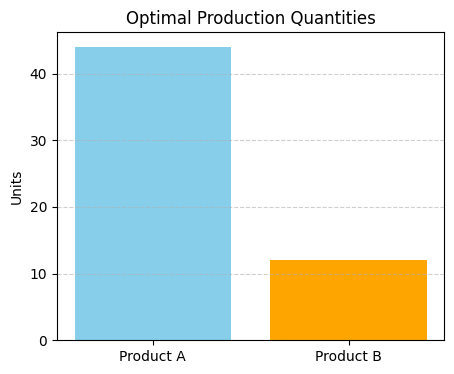

In [5]:
products = ['Product A', 'Product B']
quantities = [A.value(), B.value()]

plt.figure(figsize=(5, 4))
plt.bar(products, quantities, color=['skyblue', 'orange'])
plt.title("Optimal Production Quantities")
plt.ylabel("Units")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
